# Time Series Analysis and Forecasting

This is a series of notebooks to support lectures on _Time series analysis and forecast_.

![](https://user-images.githubusercontent.com/49638680/154160268-cf39a1ec-3557-4940-8853-d06fc7a79acf.png)

## Basics of Statistics

We start by reviewing some basic statistics concepts. In paticular, over this notebook we are going to analyse a linear regression problem, enlightening where the concepts of _distribution_, _correlation_ and _test-hypothesis_ arise.

With no further ado, let's go to import libraires and data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (15.0, 10.0)

### Data 

We are going to use a very famous dataset: CO2 concentration as measured by the [Hawaii observatory in Manua Loa](https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html). $CO_2$ concentration is measured in part-per-million (ppm). 
There exists several time-resolution of such dataset, we are going to use the daily one here.
As stated in the [technical report](https://scrippsco2.ucsd.edu/assets/publications/mauna_loa_report_high_frequency_co2_record_1958-2004.pdf), the dataset collects the atmospheric CO2 mole fraction at the Mauna Loa observatory from March 1958 through Sep 2020 with 10-minute resolution and with daily
resolution (daily “baseline” data). 

Here, we simply read the data and import them in a pandas dataframe.

In [2]:
url = 'https://pkgstore.datahub.io/core/co2-ppm-daily/co2-ppm-daily_csv/data/f2f91444294eec9f764430483fafc6be/co2-ppm-daily_csv.csv'
df = pd.read_csv(url)

In [3]:
df

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09
...,...,...
19414,2020-08-30,411.90
19415,2020-08-31,411.44
19416,2020-09-01,411.93
19417,2020-09-02,411.85


In [4]:
df.describe()

,value
count,19419.000000
mean,356.781336
std,27.753242
min,312.330000
25%,332.310000
50%,354.630000
75%,378.570000
max,418.320000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    19419 non-null  object 
 1   value   19419 non-null  float64
dtypes: float64(1), object(1)
memory usage: 303.5+ KB


and finally, the plot 📈

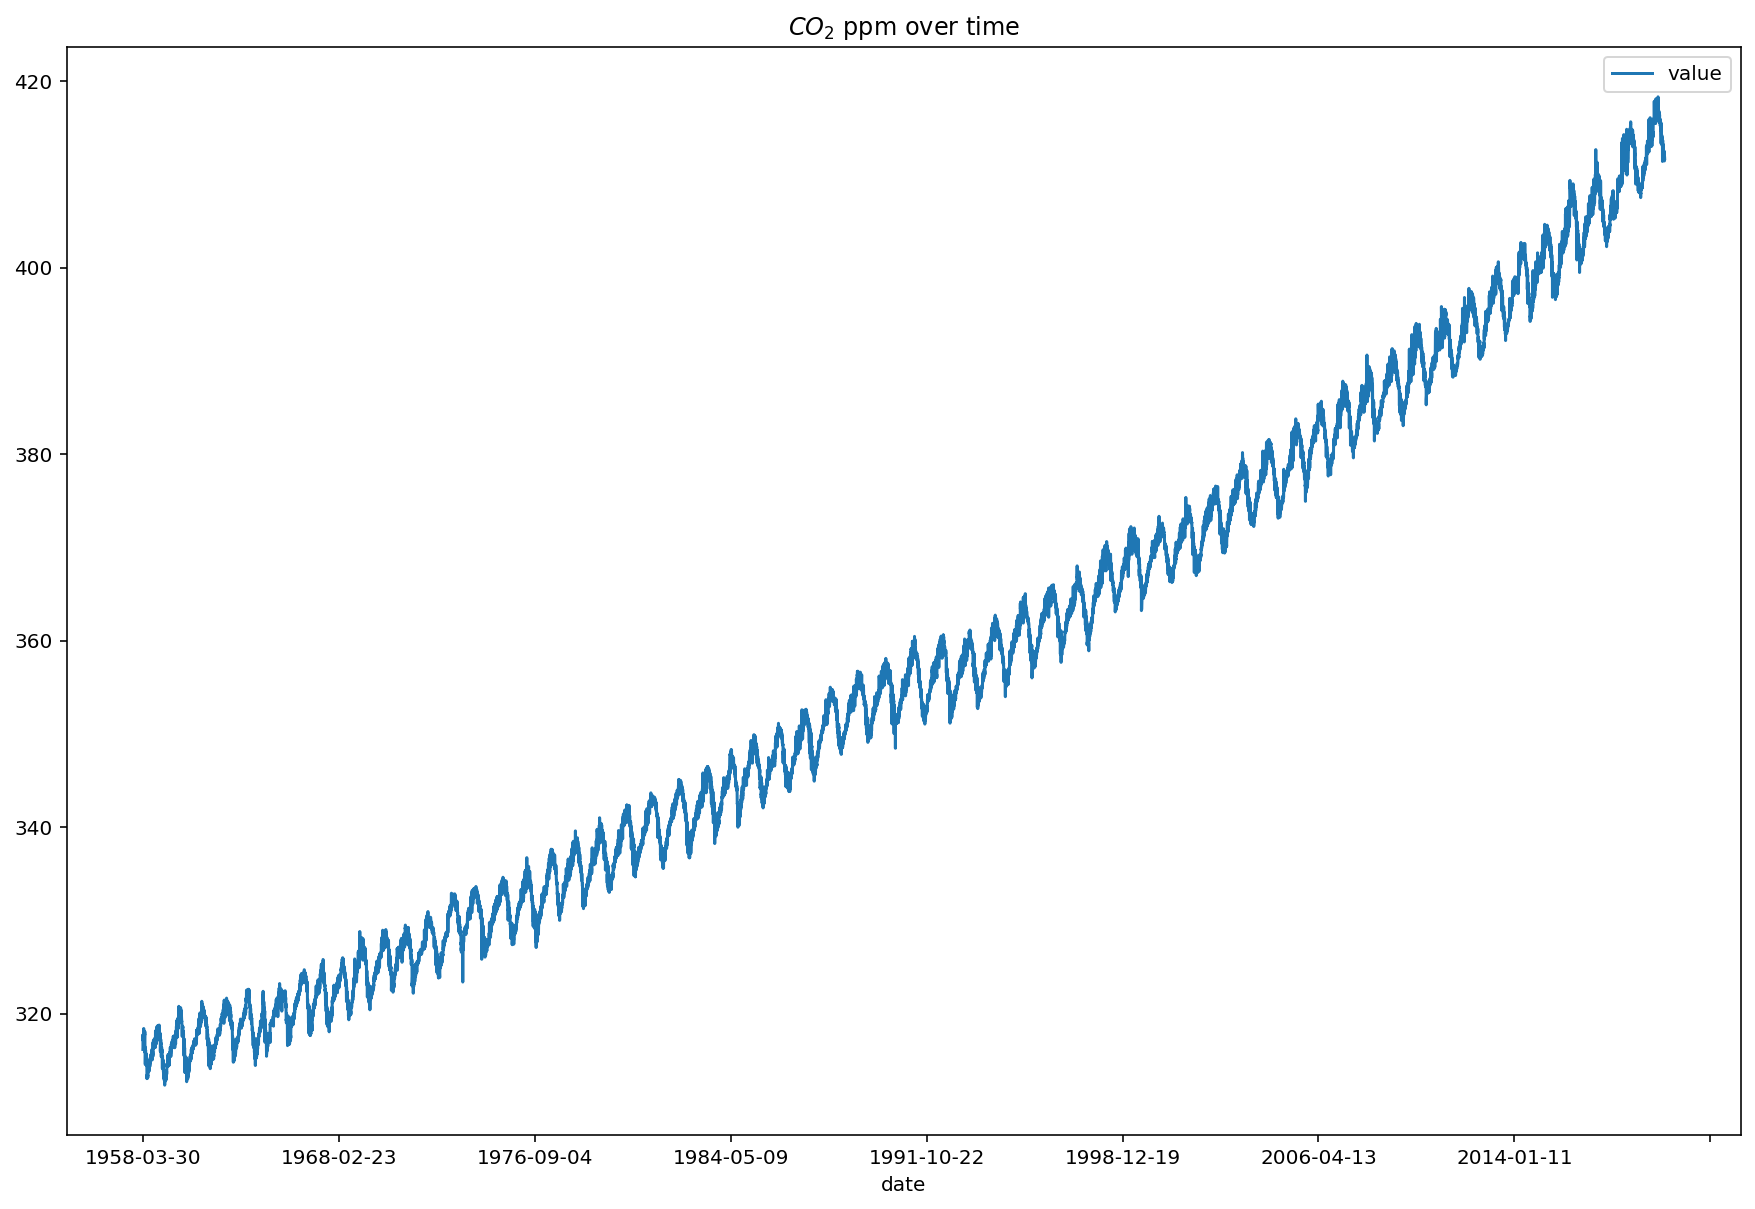

In [6]:
df.plot(x = 'date', y = 'value', title = r"$CO_{2}$ ppm over time");

### Linear regression hypotesis

Our first attempt here is to modelise the _response_ variable $y_i$ as a linear reponse to the independent variable $x_i$ plus some noise $\varepsilon_i$.

$$y_i = (\beta_0 + \beta_1 x_i) + \varepsilon_i\, .$$

The noise term $\varepsilon$ is crucial here. In order to perform predictions (the authentic aim of all data scientists) we need to make some distributional assumptions and these are carried by this term. 
It modelises the _error_ we make in assuming a linear relation and the lack of knowledge about other influences and effects.

#### Linear regression with statsmodels

We are ready to find the linear relation constants $\beta_0, \beta_1$ to map $x_i \mapsto y_i$.

In [7]:
X = df.index
y = df.value

X = sm.add_constant(X) # adding a constant (𝛽_0)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

In [8]:
df['predictions'] = predictions

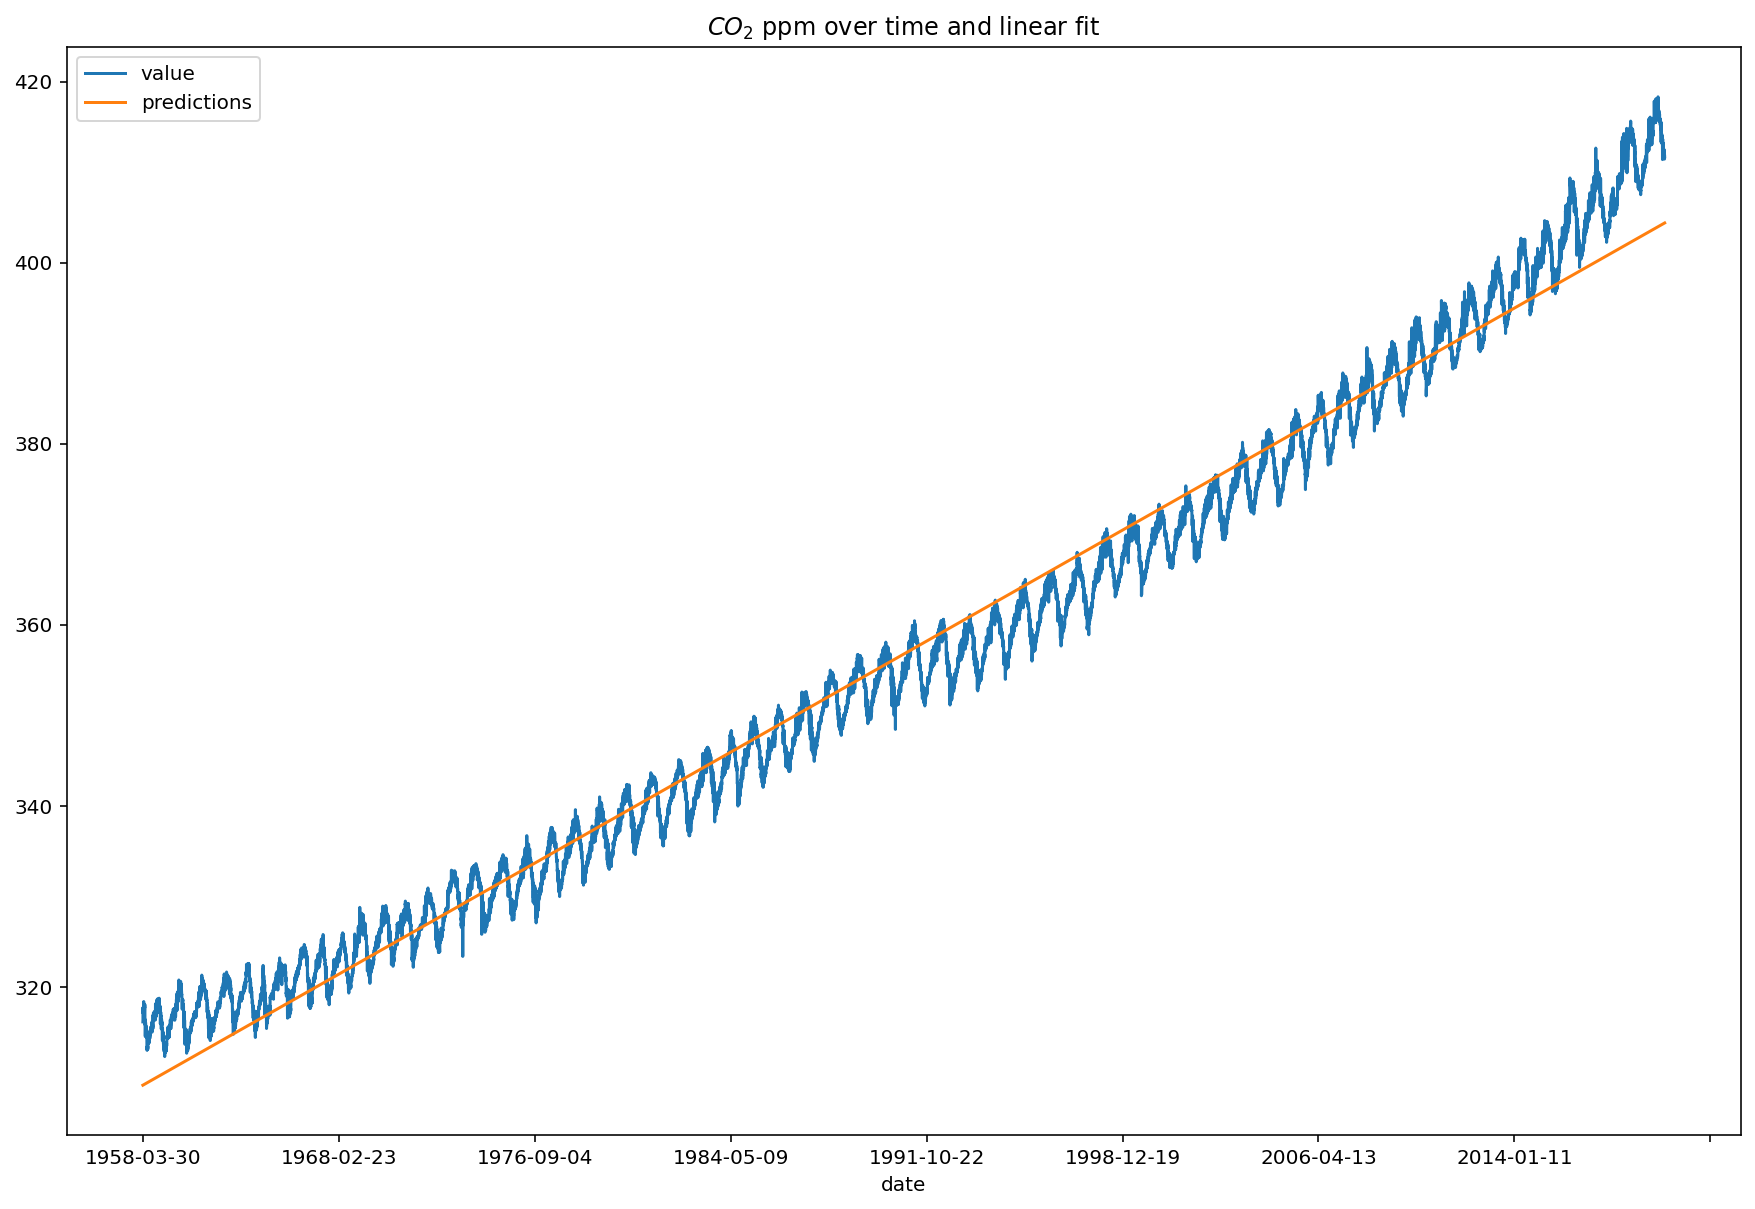

In [9]:
df.plot(x = 'date', y = ['value', 'predictions'], title = r"$CO_{2}$ ppm over time and linear fit");

We can do more, let's print the interesting quantities of the model.

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.009e+06
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:18:13   Log-Likelihood:                -53550.
No. Observations:               19419   AIC:                         1.071e+05
Df Residuals:                   19417   BIC:                         1.071e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        309.1711      0.055   5648.074      0.0

#### Some analysis and explanation

First, we start from the top: we have this summary showing the name of the dependent variable ($y$), the fit method, and the date. Hence the _number of obs_ it's the number of data we are analysing. `Df Residuals` it's another name for the number of linearly independent quantities, _i.e._ "number of data - number of quantities calculated". Notwithstanding, `Covariance Type` is listed as nonrobust. Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.

Let's move to the other column of the summary: `R-squared` is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, $0.981$ would mean our model explains $98.1\%$ of the change in our ‘value’ variable.

`Adjusted R-squared` is important for analyzing multiple dependent variables’ efficacy on the model. 
Linear regression has the property that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalises the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. In our case we only have one variable $x$, hence the two R-squares are the same.

The `F-statistic` in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. `Prob (F-Statistic)` uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. 
In this case, it is telling us $0.00\%$ chance of this, (F-statistic is huge and Prob is zero). 
`Log-likelihood` is a numerical signifier of the likelihood that your produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model. `AIC` and `BIC` are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. 

These numbers are used for feature selection of variables.

Now let's move to the model itself:

* **const**: it is the intercept, and it is the result of our model if all variables were tuned to $0$. You can see it as $\beta_0$ in the formula $y = \beta_0 + \beta_1 x$. 
* **x1**: Beneath the intercept are our variables. Here $x_1$, it corresponds to the independent variable $x$ in our case.

Our first informative column is the `coefficient`. For our intercept, it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. 
It is the $\beta_1$ in $y = \beta_0 + \beta_1 x$. 
One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

Our `std error` is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. The `t` is related and is a measurement of the precision with which the coefficient was measured. A low `std error` compared to a high coefficient produces a high `t` statistic, which signifies a high significance for your coefficient.

`P>|t|` is one of the most important statistics in the summary. It uses the `t` statistic to produce the _p-value_, a measurement of how likely your coefficient is measured through our model by chance. 
The _p-value_ of $0.378$ for $x_1$ for instance, is saying there is a $37.8\%$ chance the $x_1$ variable has no affect on the dependent variable, value, and our results are produced by chance. 
Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which our variable would pass without any doubt in this example.

`[0.025  0.975]` are both measurements of values of our coefficients within $95\%$ of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

Let's pass to the final section of the summary:

* **Omnibus** describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A $0$ would indicate perfect normalcy. 
* **Prob(Omnibus)** is a statistical test measuring the probability the residuals are normally distributed. A $1$ would indicate perfectly normal distribution. 
* **Skew** is a measurement of symmetry in our data, with $0$ being perfect symmetry. 
* **Kurtosis** measures the peakiness of our data, or its concentration around $0$ in a normal curve. Higher kurtosis implies fewer outliers.
* **Durbin-Watson** is a measurement of _homoscedasticity_, or an even distribution of errors throughout our data. _Heteroscedasticity_ would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal _homoscedasticity_ will lie between 1 and 2. 
* **Jarque-Bera (JB)** and **Prob(JB)** are alternate methods of measuring the same value as **Omnibus** and **Prob(Omnibus)** using skewness and kurtosis. We use these values to confirm each other. 
* **Condition number** is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.

All these quantities are actually there in order to check the wellness of error term hypotheses.

### Error term hypothesis

We make some hypotheses on the error term $\varepsilon$, let us state them explicitly

1. $\varepsilon_i$ are random variables distributed according to the normal distribution $\mathcal{N}(0,\sigma_\varepsilon)$.
2. The variance ($\sigma_\varepsilon^2$) is always the same (_homoscedasticity_).
3. Errors are independent of each other.

Let's assess our hypotheses.

#### Histogram of residuals

In [11]:
df['residuals'] = df['value'] - df['predictions']

/Users/oscar/miniconda3/envs/lectures/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


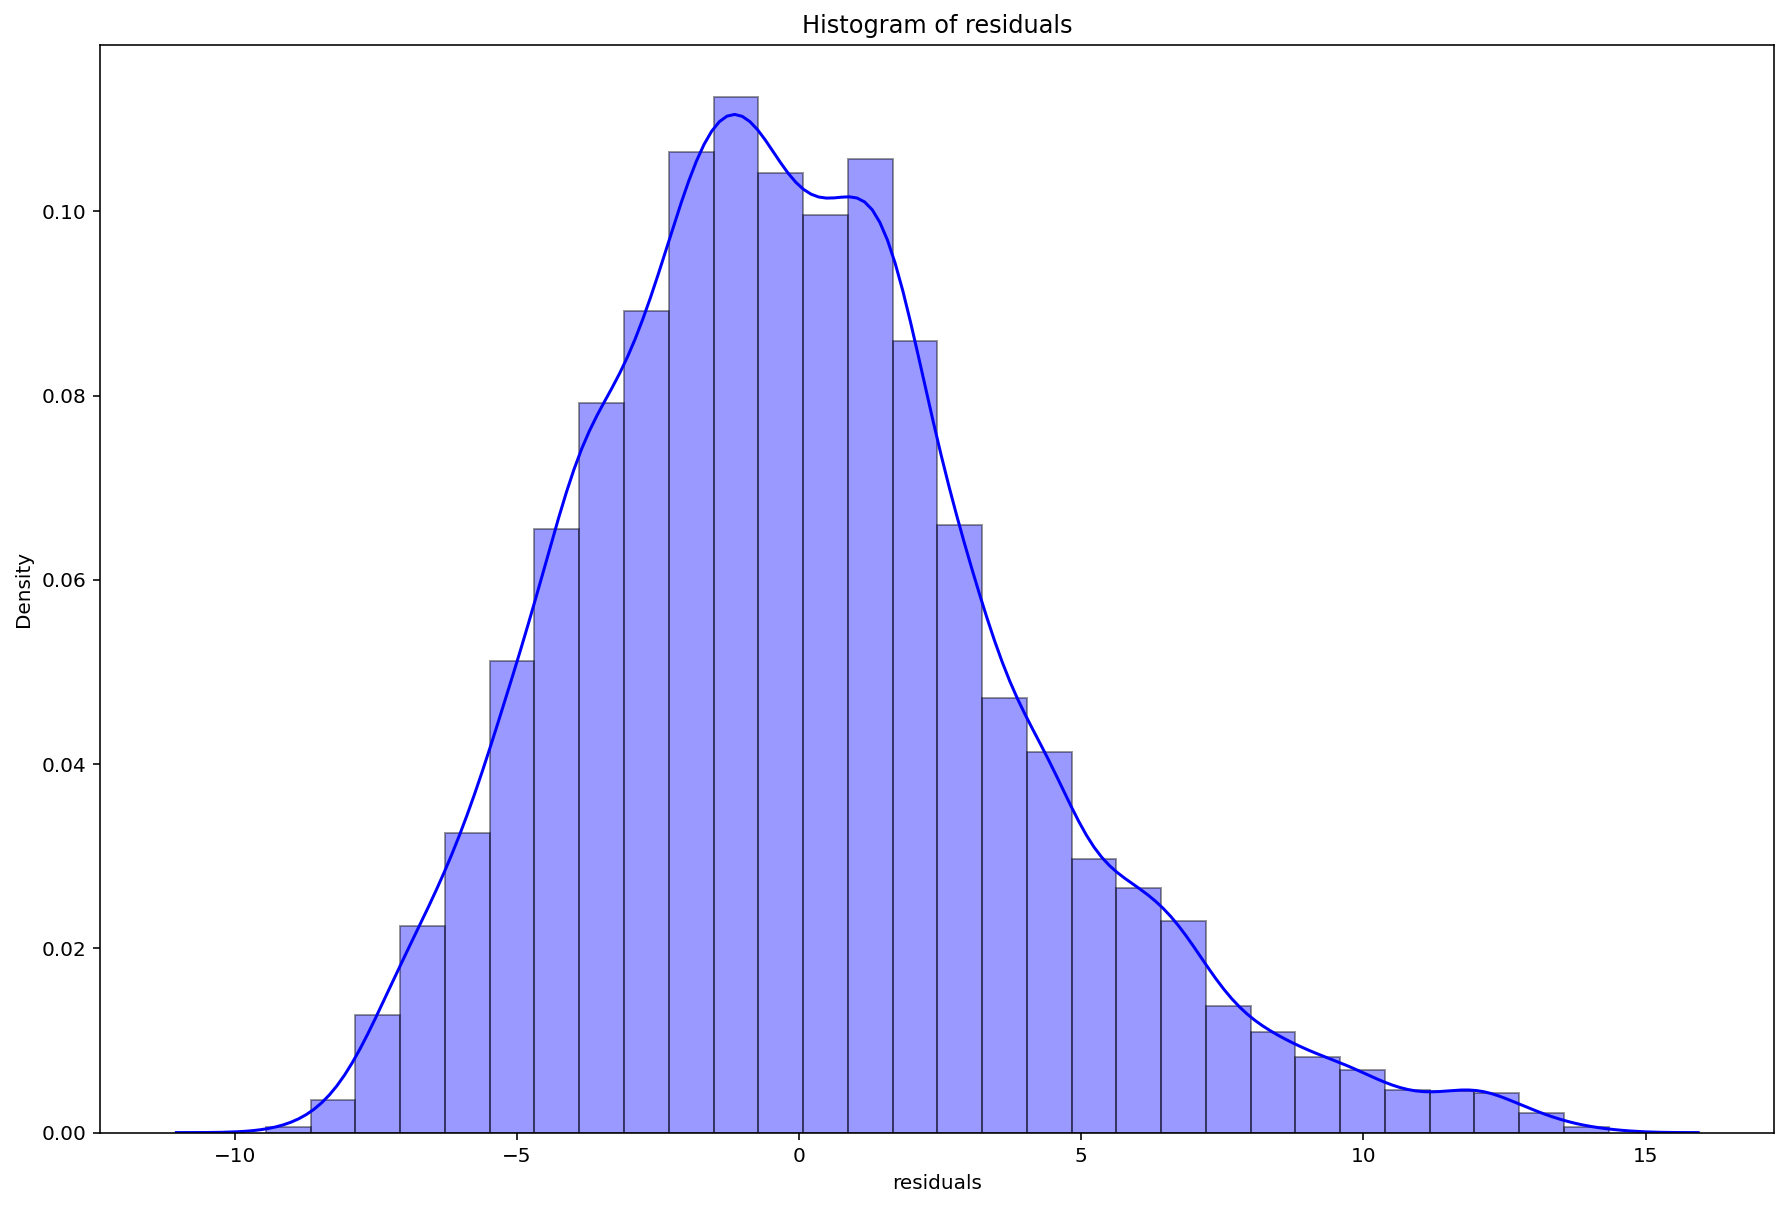

In [12]:
# seaborn histogram
sns.distplot(df.residuals, hist=True, kde=True, 
             bins=30, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of residuals');

We can see our residuals are not too far from a normal, but not precisely on it.

#### Q-Q plot
Another method is the famous [qqplot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot).

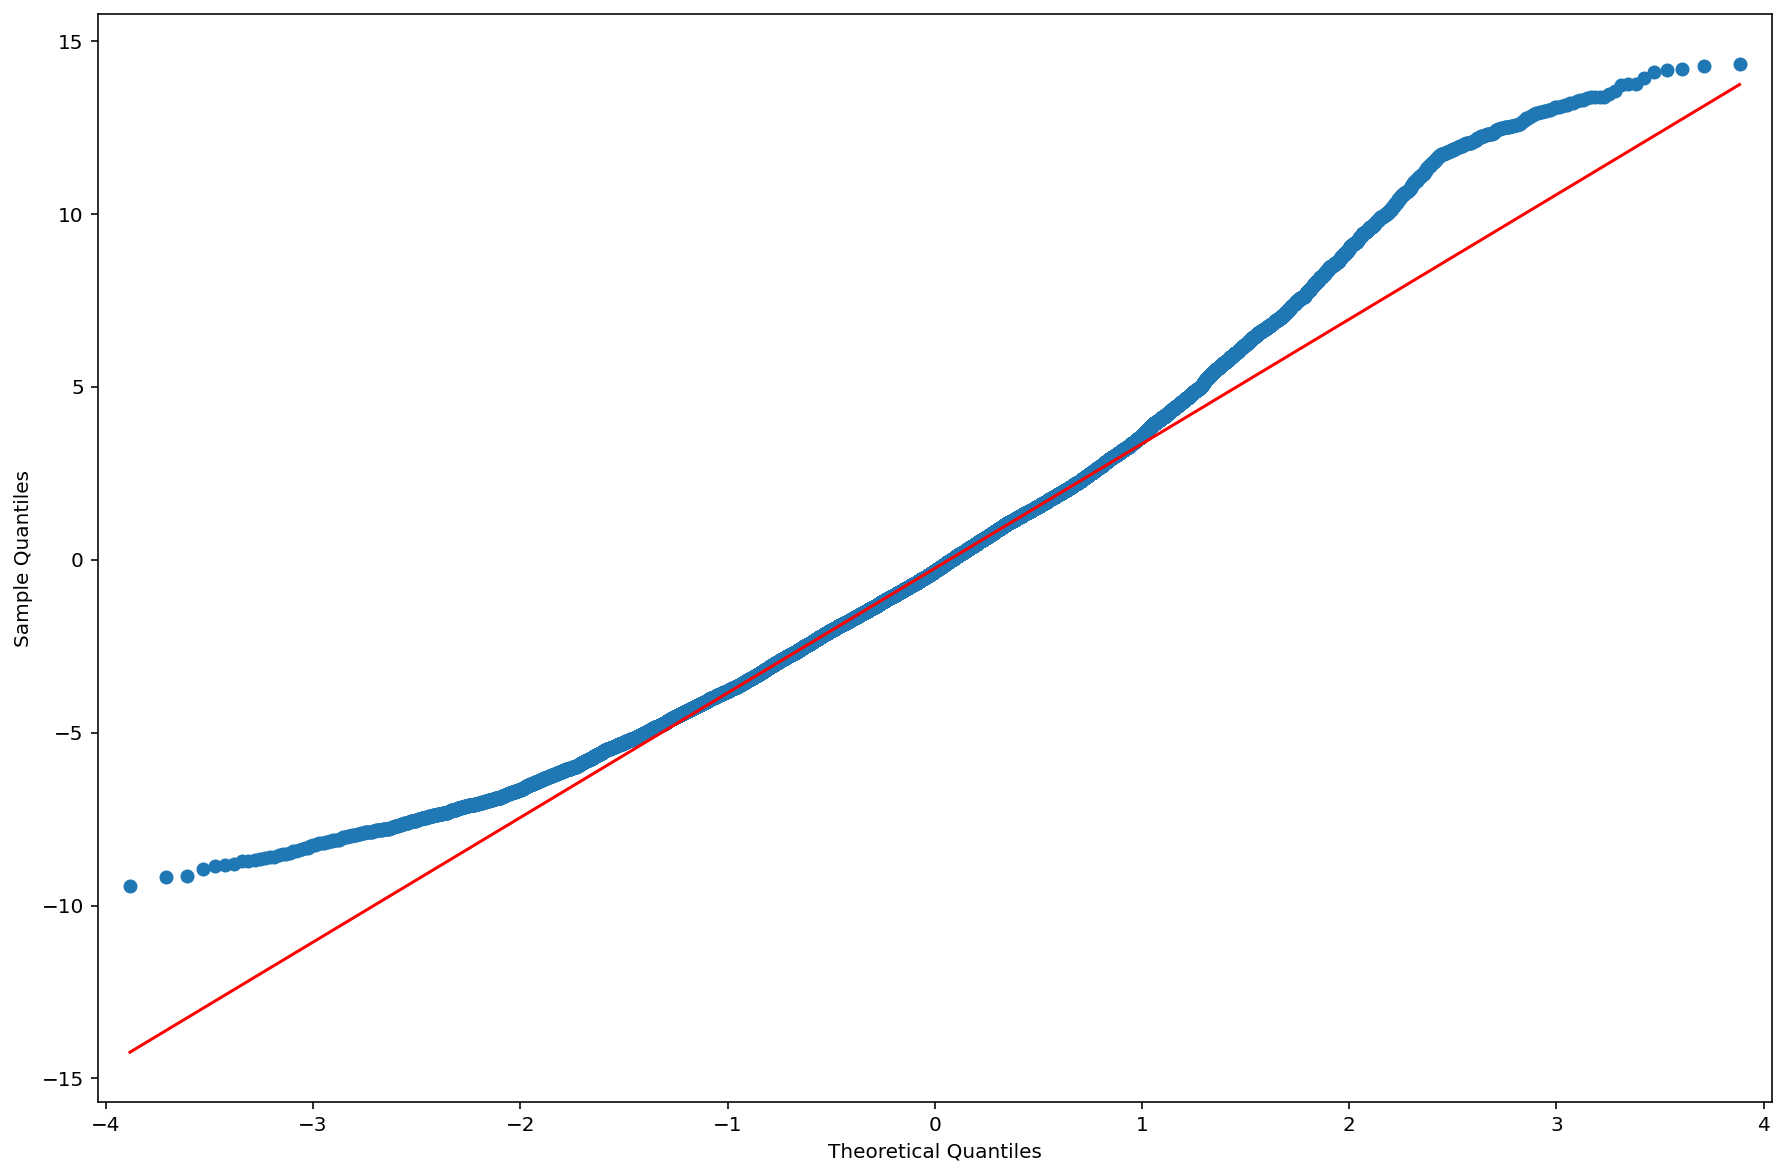

In [13]:
sm.qqplot(df.residuals, line='q');

This plot is really useful as one can immediately visualise whether a randomly distributed variable follows a certain target distribution.
Indeed, a Q–Q plot is a plot of the quantiles of two distributions against each other, or a plot based on estimates of the quantiles. The pattern of points in the plot is used to compare the two distributions.

The main step in constructing a Q–Q plot is calculating or estimating the quantiles to be plotted. If one or both of the axes in a Q–Q plot is based on a theoretical distribution with a continuous cumulative distribution function (CDF), all quantiles are uniquely defined and can be obtained by inverting the CDF. If a theoretical probability distribution with a discontinuous CDF is one of the two distributions being compared, some of the quantiles may not be defined, so an interpolated quantile may be plotted. If the Q–Q plot is based on data, there are multiple quantile estimators in use. 

#### Residuals vs Time

Another useful tool is the plot of the residuals over time, this allows us to assess _homoscedasticity_ hypothesis.

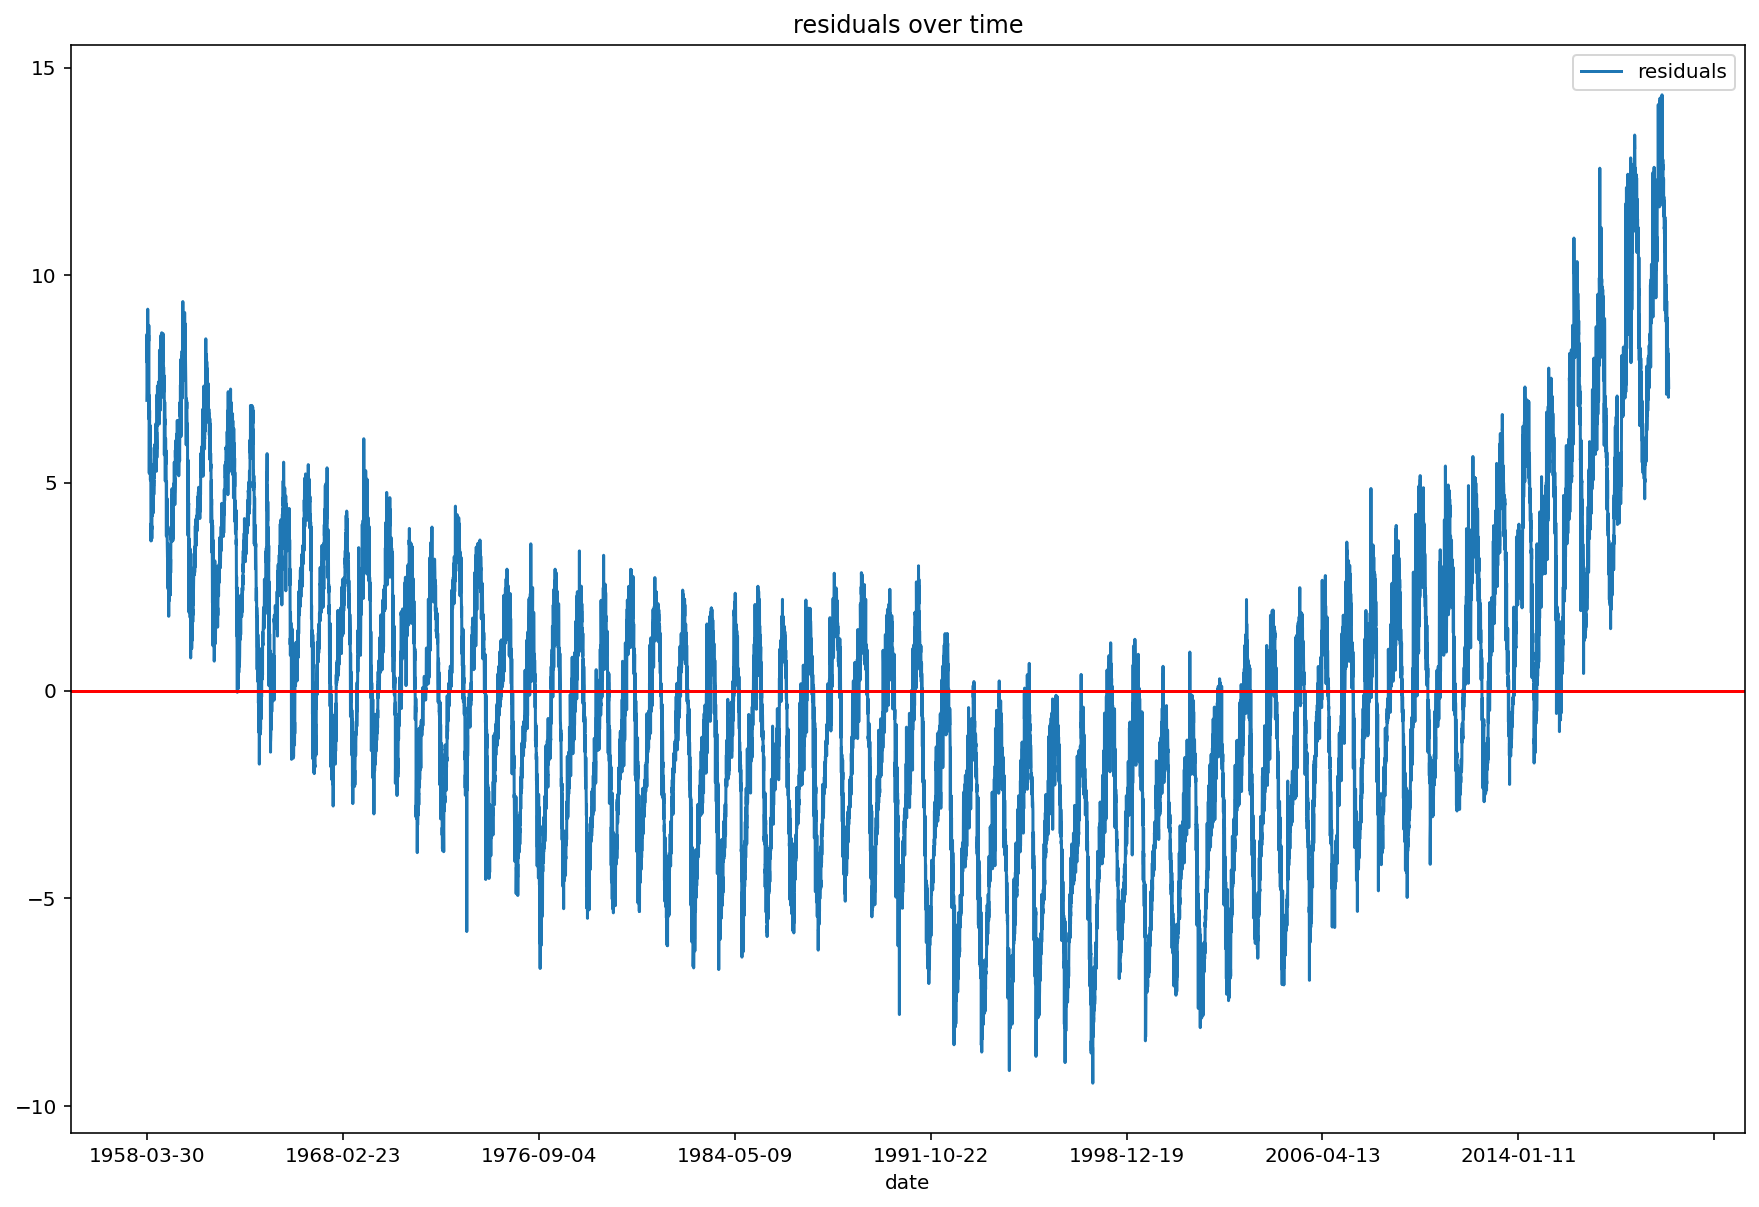

In [15]:
df.plot(x = 'date', y = 'residuals', title = r"residuals over time")
plt.axhline(y=0, color='r', linestyle='-')
plt.show();

It is even clearer that _homoscedasticity_ hypothesis holds (variance is more or less the same over the whole interval), but data do not distribute over a Gaussian. We have a "smile" curve here.